In [82]:
!pip install bertopic

In [248]:
%%time
from bertopic import BERTopic
from umap import UMAP
import pandas as pd

# Read the file, change the name for different csv file
df = pd.read_csv('italian.csv')

CPU times: user 18.1 ms, sys: 1.49 ms, total: 19.6 ms
Wall time: 20.5 ms


In [249]:
df.head()

,business_id,name,category,stars,text
0,xwSWtJcQkzTF6HNm_IMgcg,Rusty's Pizza Parlor,Italian,negative,I took an 8 year old and a 14 year old for the...
1,xwSWtJcQkzTF6HNm_IMgcg,Rusty's Pizza Parlor,Italian,negative,The delivery would bring me the wrong pizza an...
2,xwSWtJcQkzTF6HNm_IMgcg,Rusty's Pizza Parlor,Italian,positive,The pizza here is the best pizza that I have h...
3,xwSWtJcQkzTF6HNm_IMgcg,Rusty's Pizza Parlor,Italian,negative,"So pizza is pizza, so I wasn't expecting anyth..."
4,xwSWtJcQkzTF6HNm_IMgcg,Rusty's Pizza Parlor,Italian,positive,Incredible pizza. My family always gets the BB...


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  980 non-null    object
 1   name         980 non-null    object
 2   category     980 non-null    object
 3   stars        980 non-null    object
 4   text         980 non-null    object
dtypes: object(5)
memory usage: 38.4+ KB


In [251]:
# Build the Topic Model
from bertopic.representation import KeyBERTInspired
# Define the four topics
zeroshot_topic_list = ["price", "wait", "quality", "service"]
# Use UMAP model
umap_model = UMAP(n_neighbors=5,
                  n_components=5,
                  min_dist=0.0,
                  metric='cosine',
                  random_state=100)
topic_model = BERTopic(
    umap_model = umap_model,
    embedding_model="thenlper/gte-small",
    min_topic_size=5,
    zeroshot_topic_list=zeroshot_topic_list,
    zeroshot_min_similarity=.8,
    representation_model=KeyBERTInspired()
)
topics, _ = topic_model.fit_transform(df.text)

In [256]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,0,266,service,"[restaurant, food, service, dinner, server, pi...","[Came for lunch with my family, it was our fir..."
1,1,46,wait,"[restaurant, waitress, dinner, waited, server,...",[The WORST dining experience ever!\nWe recentl...
2,2,25,price,"[restaurant, pizza, price, pricey, restaurants...",[Menu is over-priced for the quality of food s...
3,3,19,quality,"[restaurant, food, takeout, pizza, tasted, piz...",[The main reason I would recommend this place ...
4,4,122,-1_restaurant_dinner_food_went,"[restaurant, dinner, food, went, pizza, place,...",[Totally unexpected goodness on the actual nig...
5,5,51,0_restaurants_restaurant_italian_delicious,"[restaurants, restaurant, italian, delicious, ...","[This is my ""go to"" Italian restaurant in SB. ..."
6,6,33,1_restaurant_dinner_food_waiter,"[restaurant, dinner, food, waiter, delicious, ...",[We were visiting from out of town and stopped...
7,7,28,2_restaurant_horrible_worst_waitress,"[restaurant, horrible, worst, waitress, eat, f...",[Updating my review from our most recent visit...
8,8,26,3_restaurant_dining_food_dinner,"[restaurant, dining, food, dinner, waiter, amb...",[The ambiance is like a cozy fairy-light place...
9,9,26,4_chase_restaurant_dining_cuisine,"[chase, restaurant, dining, cuisine, dinner, b...",[This is a very special restaurant. \n\nI've a...


In [257]:
# Dataframe the get_document_info
topic_df = topic_model.get_document_info(df.text)
topic_df

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Representative_document
0,I took an 8 year old and a 14 year old for the...,4,-1_restaurant_dinner_food_went,"[restaurant, dinner, food, went, pizza, place,...",[Totally unexpected goodness on the actual nig...,restaurant - dinner - food - went - pizza - pl...,False
1,The delivery would bring me the wrong pizza an...,17,12_pizza_pizzas_rustys_rusty,"[pizza, pizzas, rustys, rusty, rude, customer,...",[This should be 0 stars instead of 1 star. I ...,pizza - pizzas - rustys - rusty - rude - custo...,False
2,The pizza here is the best pizza that I have h...,4,-1_restaurant_dinner_food_went,"[restaurant, dinner, food, went, pizza, place,...",[Totally unexpected goodness on the actual nig...,restaurant - dinner - food - went - pizza - pl...,False
3,"So pizza is pizza, so I wasn't expecting anyth...",4,-1_restaurant_dinner_food_went,"[restaurant, dinner, food, went, pizza, place,...",[Totally unexpected goodness on the actual nig...,restaurant - dinner - food - went - pizza - pl...,False
4,Incredible pizza. My family always gets the BB...,25,20_pizza_pizzas_toppings_dominos,"[pizza, pizzas, toppings, dominos, bbq, delici...",[BBQ chicken pizza is the best i have had so f...,pizza - pizzas - toppings - dominos - bbq - de...,True
...,...,...,...,...,...,...,...
975,Wow! Just had an incredible lunch that reminde...,4,-1_restaurant_dinner_food_went,"[restaurant, dinner, food, went, pizza, place,...",[Totally unexpected goodness on the actual nig...,restaurant - dinner - food - went - pizza - pl...,False
976,They take reservations. We got lucky to be her...,0,service,"[restaurant, food, service, dinner, server, pi...","[Came for lunch with my family, it was our fir...",restaurant - food - service - dinner - server ...,False
977,The spaghetti alle vongole was subpar due to a...,7,2_restaurant_horrible_worst_waitress,"[restaurant, horrible, worst, waitress, eat, f...",[Updating my review from our most recent visit...,restaurant - horrible - worst - waitress - eat...,False
978,Came in with a party of 6 tonight. Food was am...,0,service,"[restaurant, food, service, dinner, server, pi...","[Came for lunch with my family, it was our fir...",restaurant - food - service - dinner - server ...,False


In [258]:
topic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 980 entries, 0 to 979
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Document                 980 non-null    object
 1   Topic                    980 non-null    int64 
 2   Name                     980 non-null    object
 3   Representation           980 non-null    object
 4   Representative_Docs      980 non-null    object
 5   Top_n_words              980 non-null    object
 6   Representative_document  980 non-null    bool  
dtypes: bool(1), int64(1), object(5)
memory usage: 54.6+ KB


In [259]:
# Rename topic_df column name 'document' to 'text'

topic_df = topic_df.rename(columns={'Document': 'text'})
topic_df

,text,Topic,Name,Representation,Representative_Docs,Top_n_words,Representative_document
0,I took an 8 year old and a 14 year old for the...,4,-1_restaurant_dinner_food_went,"[restaurant, dinner, food, went, pizza, place,...",[Totally unexpected goodness on the actual nig...,restaurant - dinner - food - went - pizza - pl...,False
1,The delivery would bring me the wrong pizza an...,17,12_pizza_pizzas_rustys_rusty,"[pizza, pizzas, rustys, rusty, rude, customer,...",[This should be 0 stars instead of 1 star. I ...,pizza - pizzas - rustys - rusty - rude - custo...,False
2,The pizza here is the best pizza that I have h...,4,-1_restaurant_dinner_food_went,"[restaurant, dinner, food, went, pizza, place,...",[Totally unexpected goodness on the actual nig...,restaurant - dinner - food - went - pizza - pl...,False
3,"So pizza is pizza, so I wasn't expecting anyth...",4,-1_restaurant_dinner_food_went,"[restaurant, dinner, food, went, pizza, place,...",[Totally unexpected goodness on the actual nig...,restaurant - dinner - food - went - pizza - pl...,False
4,Incredible pizza. My family always gets the BB...,25,20_pizza_pizzas_toppings_dominos,"[pizza, pizzas, toppings, dominos, bbq, delici...",[BBQ chicken pizza is the best i have had so f...,pizza - pizzas - toppings - dominos - bbq - de...,True
...,...,...,...,...,...,...,...
975,Wow! Just had an incredible lunch that reminde...,4,-1_restaurant_dinner_food_went,"[restaurant, dinner, food, went, pizza, place,...",[Totally unexpected goodness on the actual nig...,restaurant - dinner - food - went - pizza - pl...,False
976,They take reservations. We got lucky to be her...,0,service,"[restaurant, food, service, dinner, server, pi...","[Came for lunch with my family, it was our fir...",restaurant - food - service - dinner - server ...,False
977,The spaghetti alle vongole was subpar due to a...,7,2_restaurant_horrible_worst_waitress,"[restaurant, horrible, worst, waitress, eat, f...",[Updating my review from our most recent visit...,restaurant - horrible - worst - waitress - eat...,False
978,Came in with a party of 6 tonight. Food was am...,0,service,"[restaurant, food, service, dinner, server, pi...","[Came for lunch with my family, it was our fir...",restaurant - food - service - dinner - server ...,False


In [260]:
# Merge df and topic_df on the column 'text'

import pandas as pd
merged_df = pd.merge(df, topic_df, on='text')
merged_df.head()


,business_id,name,category,stars,text,Topic,Name,Representation,Representative_Docs,Top_n_words,Representative_document
0,xwSWtJcQkzTF6HNm_IMgcg,Rusty's Pizza Parlor,Italian,negative,I took an 8 year old and a 14 year old for the...,4,-1_restaurant_dinner_food_went,"[restaurant, dinner, food, went, pizza, place,...",[Totally unexpected goodness on the actual nig...,restaurant - dinner - food - went - pizza - pl...,False
1,xwSWtJcQkzTF6HNm_IMgcg,Rusty's Pizza Parlor,Italian,negative,The delivery would bring me the wrong pizza an...,17,12_pizza_pizzas_rustys_rusty,"[pizza, pizzas, rustys, rusty, rude, customer,...",[This should be 0 stars instead of 1 star. I ...,pizza - pizzas - rustys - rusty - rude - custo...,False
2,xwSWtJcQkzTF6HNm_IMgcg,Rusty's Pizza Parlor,Italian,positive,The pizza here is the best pizza that I have h...,4,-1_restaurant_dinner_food_went,"[restaurant, dinner, food, went, pizza, place,...",[Totally unexpected goodness on the actual nig...,restaurant - dinner - food - went - pizza - pl...,False
3,xwSWtJcQkzTF6HNm_IMgcg,Rusty's Pizza Parlor,Italian,negative,"So pizza is pizza, so I wasn't expecting anyth...",4,-1_restaurant_dinner_food_went,"[restaurant, dinner, food, went, pizza, place,...",[Totally unexpected goodness on the actual nig...,restaurant - dinner - food - went - pizza - pl...,False
4,xwSWtJcQkzTF6HNm_IMgcg,Rusty's Pizza Parlor,Italian,positive,Incredible pizza. My family always gets the BB...,25,20_pizza_pizzas_toppings_dominos,"[pizza, pizzas, toppings, dominos, bbq, delici...",[BBQ chicken pizza is the best i have had so f...,pizza - pizzas - toppings - dominos - bbq - de...,True


In [261]:
# Select the four topics price, wait, service, and quality

filtered_df = merged_df[merged_df['Name'].isin(['price', 'wait', 'service', 'quality'])]


In [262]:
filtered_df

,business_id,name,category,stars,text,Topic,Name,Representation,Representative_Docs,Top_n_words,Representative_document
8,xwSWtJcQkzTF6HNm_IMgcg,Rusty's Pizza Parlor,Italian,negative,"Don't place a delivery order from here, or act...",0,service,"[restaurant, food, service, dinner, server, pi...","[Came for lunch with my family, it was our fir...",restaurant - food - service - dinner - server ...,False
10,xwSWtJcQkzTF6HNm_IMgcg,Rusty's Pizza Parlor,Italian,negative,"Good pizza, but lousy service.\n\nLook, Rusty'...",0,service,"[restaurant, food, service, dinner, server, pi...","[Came for lunch with my family, it was our fir...",restaurant - food - service - dinner - server ...,False
11,xwSWtJcQkzTF6HNm_IMgcg,Rusty's Pizza Parlor,Italian,negative,"Yikes. Cold, fatty chicken wings. When told th...",1,wait,"[restaurant, waitress, dinner, waited, server,...",[The WORST dining experience ever!\nWe recentl...,restaurant - waitress - dinner - waited - serv...,False
13,xwSWtJcQkzTF6HNm_IMgcg,Rusty's Pizza Parlor,Italian,negative,How anyone thinks this is better than Ellios p...,0,service,"[restaurant, food, service, dinner, server, pi...","[Came for lunch with my family, it was our fir...",restaurant - food - service - dinner - server ...,False
14,xwSWtJcQkzTF6HNm_IMgcg,Rusty's Pizza Parlor,Italian,negative,Love Rustys Garlic Cheesy Bread and my hubby i...,1,wait,"[restaurant, waitress, dinner, waited, server,...",[The WORST dining experience ever!\nWe recentl...,restaurant - waitress - dinner - waited - serv...,False
...,...,...,...,...,...,...,...,...,...,...,...
971,9xW7LsJpyhVZFRb6z9xorg,Ca' Dario Goleta,Italian,negative,"Great food, delicious wine, I love the portion...",0,service,"[restaurant, food, service, dinner, server, pi...","[Came for lunch with my family, it was our fir...",restaurant - food - service - dinner - server ...,False
975,9xW7LsJpyhVZFRb6z9xorg,Ca' Dario Goleta,Italian,positive,So glad that Ca'Dario set us a table in Goleta...,0,service,"[restaurant, food, service, dinner, server, pi...","[Came for lunch with my family, it was our fir...",restaurant - food - service - dinner - server ...,False
976,9xW7LsJpyhVZFRb6z9xorg,Ca' Dario Goleta,Italian,positive,A wonderful Italian restaurant with a great at...,2,price,"[restaurant, pizza, price, pricey, restaurants...",[Menu is over-priced for the quality of food s...,restaurant - pizza - price - pricey - restaura...,False
981,9xW7LsJpyhVZFRb6z9xorg,Ca' Dario Goleta,Italian,positive,They take reservations. We got lucky to be her...,0,service,"[restaurant, food, service, dinner, server, pi...","[Came for lunch with my family, it was our fir...",restaurant - food - service - dinner - server ...,False


In [263]:
# See the distribution of negative review and positive review of each restaurant

restaurant_counts = filtered_df.groupby('name')['stars'].value_counts().unstack()
restaurant_counts


stars,negative,positive
name,,
Ca' Dario Goleta,3,7
Chase Restaurant,90,54
PizzaMan Dan's,15,26
Rusty's Pizza Parlor,29,3
Tre Lune,54,75


In [264]:
# See the distribution in percentages

restaurant_percentages = (100 * filtered_df.groupby('name')['stars'].value_counts().unstack().div(filtered_df.groupby('name')['stars'].value_counts().unstack().sum(axis=1), axis=0)).round(1).astype(str) + '%'
restaurant_percentages


stars,negative,positive
name,,
Ca' Dario Goleta,30.0%,70.0%
Chase Restaurant,62.5%,37.5%
PizzaMan Dan's,36.6%,63.4%
Rusty's Pizza Parlor,90.6%,9.4%
Tre Lune,41.9%,58.1%


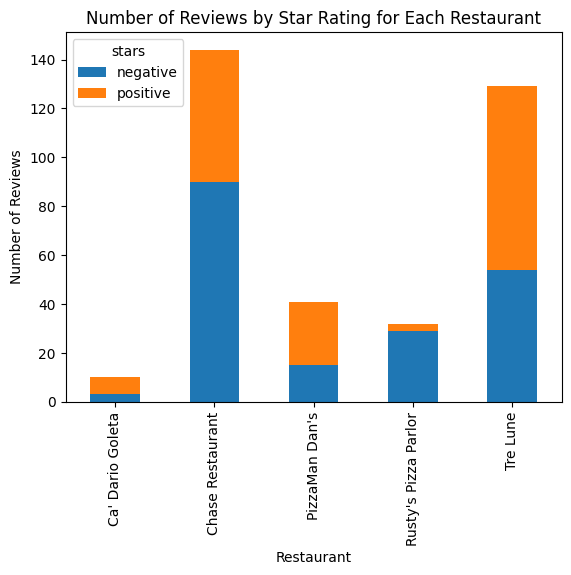

In [265]:
# Visualize the distribution of negative and positive reviews of each restaurant
import matplotlib.pyplot as plt

unique_stars_count = filtered_df.groupby('name')['stars'].value_counts().unstack()

unique_stars_count.plot(kind='bar', stacked=True)
plt.title('Number of Reviews by Star Rating for Each Restaurant')
plt.xlabel('Restaurant')
plt.ylabel('Number of Reviews')
plt.show()


In [267]:
# Distribution of the negative and positive review in each four topics

topic_counts = filtered_df.groupby('Name')['stars'].value_counts().unstack()
topic_counts

stars,negative,positive
Name,,
price,16,9
quality,10,9
service,124,142
wait,41,5


In [269]:
# Distribution in Percentage format

topic_percentages = (100 * topic_counts.div(topic_counts.sum(axis=1), axis=0)).round(1).astype(str) + '%'
topic_percentages


stars,negative,positive
Name,,
price,64.0%,36.0%
quality,52.6%,47.4%
service,46.6%,53.4%
wait,89.1%,10.9%


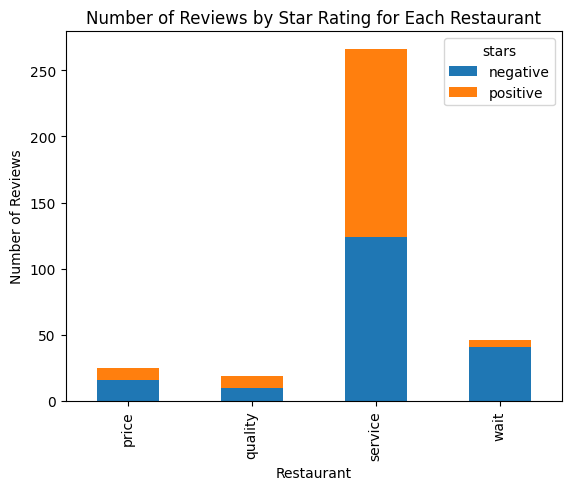

In [270]:
# Visualize the distribution
topic_stars_count = filtered_df.groupby('Name')['stars'].value_counts().unstack()

topic_stars_count.plot(kind='bar', stacked=True)
plt.title('Number of Reviews by Star Rating for Each Restaurant')
plt.xlabel('Restaurant')
plt.ylabel('Number of Reviews')
plt.show()

In [271]:
# Visualize the top 10 words in each four topics
topic_model.visualize_barchart(top_n_topics=4,n_words=10,height = 500)

In [ ]:
pip install wordcloud

In [272]:
from wordcloud import WordCloud, STOPWORDS

In [273]:
freq = topic_model.get_topic_info()
print("Number of topics: {}".format(len(freq)))
freq.head(4)

Number of topics: 36


,Topic,Count,Name,Representation,Representative_Docs
0,0,266,service,"[restaurant, food, service, dinner, server, pi...","[Came for lunch with my family, it was our fir..."
1,1,46,wait,"[restaurant, waitress, dinner, waited, server,...",[The WORST dining experience ever!\nWe recentl...
2,2,25,price,"[restaurant, pizza, price, pricey, restaurants...",[Menu is over-priced for the quality of food s...
3,3,19,quality,"[restaurant, food, takeout, pizza, tasted, piz...",[The main reason I would recommend this place ...


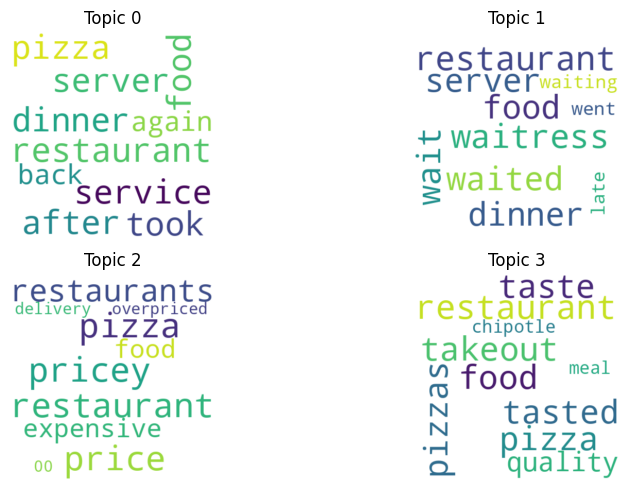

In [274]:
# Create word clouds for the first four topics
number_of_topics = 4
topics_to_visualize = freq.iloc[0:number_of_topics]["Topic"]

# Set up the figure size for four subplots
plt.figure(figsize=(10, 5))

# Loop through the topics and add a subplot for each word cloud
for i, topic_number in enumerate(topics_to_visualize, start=1):
    # Get the words and their frequencies for the current topic
    topic_words = dict(topic_model.get_topic(topic_number))

    # Generate the word cloud
    wordcloud = WordCloud(width=400, height=400, background_color='white', min_font_size=10).generate_from_frequencies(topic_words)

    # Add a new subplot in a 2x2 grid
    ax = plt.subplot(2, 2, i)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {topic_number}')
    plt.axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
